In [65]:
import sys, os, importlib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import src.portfolio_tracker.io as io
importlib.reload(io)                # reloads code from disk
from src.portfolio_tracker.io import load_holdings, fetch_prices


In [66]:
from pathlib import Path
from src.portfolio_tracker.io import load_holdings

csv_path = Path("../data/sample_holdings.csv").resolve()
print(csv_path)
holdings = load_holdings(str(csv_path))
holdings


/files/capstone_project_LB/data/sample_holdings.csv


,account_id,asset_id,asset_type,ticker,currency,quantity,avg_cost
0,acc1,asset_equity,Equity,AAPL,USD,10.00,150
1,acc1,asset_etf,ETF,SPY,USD,5.00,400
2,acc1,asset_crypto,Crypto,BTC-USD,USD,0.02,35000


Failed to get ticker 'BTC-USD' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'SPY' reason: Expecting value: line 1 column 1 (char 0)

3 Failed downloads:
['BTC-USD', 'AAPL', 'SPY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Tickers: ['AAPL', 'SPY', 'BTC-USD']
⚠️ Yahoo download failed; generating synthetic prices for offline use.
Prices shape: (746, 3)


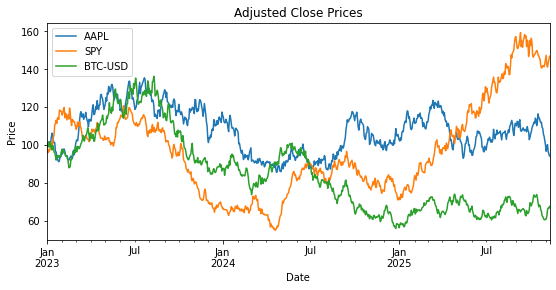

In [67]:

tickers = holdings["ticker"].astype(str)
print("Tickers:", tickers.tolist())
prices = fetch_prices(tickers, start="2023-01-01")
prices.head()


print("Prices shape:", prices.shape)
ax = prices.ffill().plot(figsize=(9,4))
ax.set_title("Adjusted Close Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.show()


Prices shape: (746, 3)


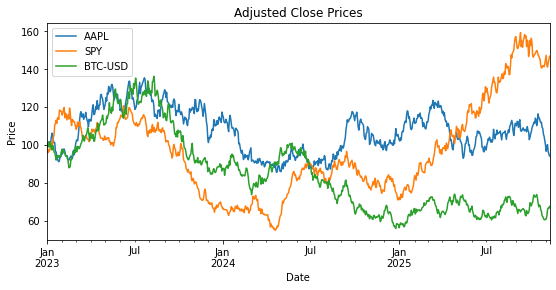

In [68]:
print("Prices shape:", prices.shape)

import matplotlib.pyplot as plt
ax = prices.ffill().plot(figsize=(9,4))
ax.set_title("Adjusted Close Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.show()
